## Learning outcomes (Tutorial 3)

1. Gentle intro on CV (CV is a subfield of AI)
2. Recap image as Numpy array 
3. Splitting / merging of color channels 
4. Image cropping 
5. Mathematical operations
    - elementary operations: addition subtraction, multiplication, division
    - gamma correction (nonlinear technique)
6. Image blending (add 2 images together)

In [17]:
import sys
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
from util_func import show_img

## Recap on images as Numpy array
There are 2 primary types of images: **grayscale** and **color** (:-: is central aligned)

| grayscale | color |
| :-: | :-: |
| matrix (2D array) | 3D array |
| (h, w) | (h, w, c) |

In [2]:
#Create a grayscale image
img = np.zeros((2, 4), dtype = np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


In [3]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR) # gray -> Color = (2,4) -> (2,4,3)
print(img_color)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [4]:
# indexing img[0,1] =  0 = first row, 1 = second column

img[0,1] = 25
img[1,2] = 150

print(img)

[[  0  25   0   0]
 [  0   0 150   0]]


In [5]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_color)

[[[  0   0   0]
  [ 25  25  25]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [150 150 150]
  [  0   0   0]]]


## Access elements in array

In [6]:
img =cv.imread("images/lena.jfif")

# two methods

a = img[49,219,2]
b = img.item(49,219,2)
a == b

True

In [7]:
%timeit a = img[49,219,2]
%timeit b = img.item(49,219,2)

132 ns ± 3.42 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
122 ns ± 1.54 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Numpy slicing

In [ ]:
h,w = img.shape[:2]
yc, xc = h // 2, w // 2# stands for center y and center z

topleft = img[:yc, :xc]

show_img("topleft", topleft)

In [ ]:
# 60x60 central region of the image

centre = img[yc-30:yc+30, xc-30:xc+30]

show_img("centre", centre)

## Create a white image

In [10]:
img = np.zeros((200,200)) + 255
img = np.uint8(img)

show_img("img", img)

## Exercise

In [11]:
## Extract region of interest
img = cv.imread("images/flower.jfif")

show_img("img", img)

### There are three ways to get the indices needed.

In [12]:
[i for i in dir(cv) if i.startswith("EVENT")]

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

In [19]:
# 1 way
img = cv.imread("images/flower.jfif")
img_copy = img.copy()
def rect_region(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        cv.circle(img, (x,y), 1, (0,0,255), -1)
        cv.imshow("img",img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", rect_region)
cv.waitKey(0)
cv.destroyAllWindows()

In [20]:
flower = img_copy[41:120, 89:173]

show_img("flower", flower)

In [21]:
# 2nd way:

bbox = cv.selectROI("crop", img_copy)

flower = img_copy[int(bbox[1]):int(bbox[1] + bbox[3]),
                 int(bbox[0]): int(bbox[0] + bbox[2])]

show_img('flower', flower)

# 3rd way: paint app

## Exercise


In [20]:
img_arr = np.zeros((30,30), dtype=np.uint8)

img_arr[:10, 10:20] = 255
img_arr[10:20, :10] = 255
img_arr[10:20, 20:] = 255
img_arr[20:, 10:20] = 255

img = np.tile(img_arr, (3,3))

show_img("pattern", img)

## Image Cropping
Why?
- Remove undanted object
- Seperate the image into a $3 \times 3$ grids. We move / adgust the camera in such a way that the object of interest lies on the gridline or their intersections as such your image will look more aesthetically appealing. This is known as rule of thirds.
- One of the image augmentation methods for deep learning (DL) model training

In [12]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

h, w = img.shape[:2]
# user defined parameters
n_vertical_grids = 4
n_horizontal_grids = 4

M = int(h / n_vertical_grids)
N = int(w / n_horizontal_grids)

tiles = []

for y in range(0, h, M):
    for x in range(0, w, N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1 > h:
            x1 = w - 1
            y1 = h - 1
            cv.rectangle(img_copy, (x,y), (x1,y1), (0,255,0), 1)
            tile = img[y:h, x:w]
            tiles.append(tile)
            
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy, (x,y), (x1,y1), (0,255,0), 1)
            tile = img[y:h, x:x1]
            tiles.append(tile)
            
        elif x1 > w:
            x1 = w - 1
            cv.rectangle(img_copy, (x,y), (x1,y1), (0,255,0), 1)
            tile = img[y:y1, x:w]
            tiles.append(tile)
            
        else:
            cv.rectangle(img_copy, (x,y), (x1,y1), (0,255,0), 1)
            tile = img[y:y1, x:x1]
            tiles.append(tile)
            
show_img("crop", img_copy)

In [13]:
show_img("patch", tiles[5])

## Splitting and merging color channels

In [27]:
img = cv.imread("images/lena.jfif")

(b, g, r) = cv.split(img)
img_merge = cv.merge((b, g, r))
np.array_equal(img, img_merge)

True

In [28]:
import matplotlib.pyplot as plt

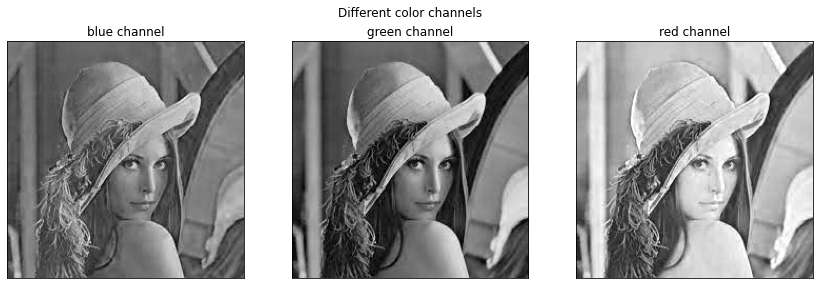

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True) #one row, three columns
fig.suptitle("Different color channels")

ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title="blue channel", xticks=[], yticks=[])
ax2.imshow(g, cmap=plt.cm.gray)
ax2.set(title="green channel", xticks=[], yticks=[])
ax3.imshow(r, cmap=plt.cm.gray)
ax3.set(title="red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

### Display different channels in color

In [41]:
img = cv.imread("images/dog.jfif")

channels = cv.split(img)
#this color variable will be window names
colors = ("blue", "green", "red")

imgs = []

for i, ch in enumerate(channels):
    img_arr = np.zeros_like(img) # creates a zero arrays at the same dimensions
    img_arr[:, :, i] = ch
    # img_arr[..., i] = ch
    imgs.append(img_arr)
    
for c, img in zip(colors, imgs):
    cv.imshow(c, img)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Point operators
Elementary math operations: addition, subtraction, multiplication, division.

$$f_{trans}(\textbf{x}) = \alpha f(\textbf{x}) + \beta$$

- if $\alpha$ is > than 1, contrast increases
- if $\alpha$ is < than 1 and > than 0, contrast decrease
- if $\beta$ is > than 1, brightness increases
- if $\beta$ is < than 1 and > than 0, brightness decrease

In [42]:
np.uint8(np.array([-2, 0, 255,300]))

array([254,   0, 255,  44], dtype=uint8)

In [43]:
def point_op(img,alpha,beta):
    """point operators of image. Arguments:
    1. source image
    2. multiplier
    3. Constant"""
    
    img = img.astype(float)
    res = alpha * img + beta
    res = np.clip(res, 0, 255)
    return np.uint8(res)

In [44]:
img = cv.imread("images/bridge.jfif")

# increase the brightness and contrast
transform = point_op(img, 1.6, 20)
cv.imshow("original", img)
show_img("transform", transform)

In [45]:
darken = point_op(img,1,-80)

show_img("img", darken)

## Gamma correction

Technique to adjust brightness of image.

$$O = (\frac{I}{255})^{\gamma} \times 255$$

In [57]:
gamma = 1/1.2

lookUpTable = np.empty((1,256), dtype = np.uint8)

for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0 ,255)
    
img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img, lookUpTable)

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("original", img)
show_img("gamma correction", res, adjust = True)

## Image blending (add 2 images)
```
cv.addWeighted(img1, alpha, img2, 1-alpha, beta)
```

$$h(\textbf{x}) = \alpha f(\textbf{x}) + (1 - \alpha)g(\textbf{x}) + \beta$$

In [1]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# resize img 2 to be the same dimension as img
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))
alpha = 0.1

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

cv.imshow("lena", img)
cv.imshow("resized coin", img2)
show_img("image blending", res)

NameError: name 'cv' is not defined

Exercise 1

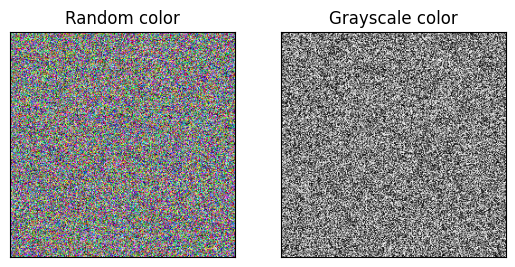

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
from util_func import show_img

height = 250
width = 250

#(min,max (height, weight, channel), datatype)
color = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
gray = np.random.randint(0, 256, (height, width), dtype=np.uint8)

plt.subplot(121)
plt.imshow(color)
plt.title("Random color")
plt.xticks([]), plt.yticks([]) 

plt.subplot(122)
plt.imshow(gray, cmap=plt.cm.gray)
plt.title("Grayscale color")
plt.xticks([]), plt.yticks([]) 
plt.show()

Exercise 2

In [3]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    
    img = cv.imread(img)
    img_copy = img.copy()

    h, w = img.shape[:2]
    vertical = num_vertical_grid  
    horizontal = num_horizontal_grid 

    M = int(h / vertical)
    N = int(w / horizontal)

    tiles = []
    
    for y in range(0, h, M):
        for x in range(0, w, N):
            x1 = x + N
            y1 = y + M

            if x1 > w and y1 > h:
                x1 = w - 1
                y1 = h - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:h, x:w]
                tiles.append(tile)

            elif y1 > h:
                y1 = h - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:h, x:x1]
                tiles.append(tile)

            elif x1 > w:
                x1 = w - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)

            else:
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:y1, x:x1]
                tiles.append(tile)

    show_img("crop", img_copy)

In [5]:
crop_grid("images/dog.jfif", 3, 3, (0,3,0))

Exercise 3

In [15]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# resize img 2 to be the same dimension as img
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

# since alpha scale from 0 to 1, and there is no way
# to do for loop with decimals, alpha /= by the number 

for alpha in range(0,250): 
    alpha /= 250
    res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)
    cv.imshow("transition", res)
    cv.waitKey(10)

cv.waitKey(0)
cv.destroyAllWindows()

Exercise 4 #need help on this question :)